In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Books_Data_Clean.csv")

In [ ]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


- Publishing Year is float
- language_code is inconsistent

In [ ]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,535.926660,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,308.769358,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.000000,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,535.000000,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,802.000000,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


- Publishing Year min is minus

In [ ]:
df = df[df["Publishing Year"] > 1900]

In [ ]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,0
Author,0
language_code,47
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [ ]:
df.dropna(subset = "Book Name", inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


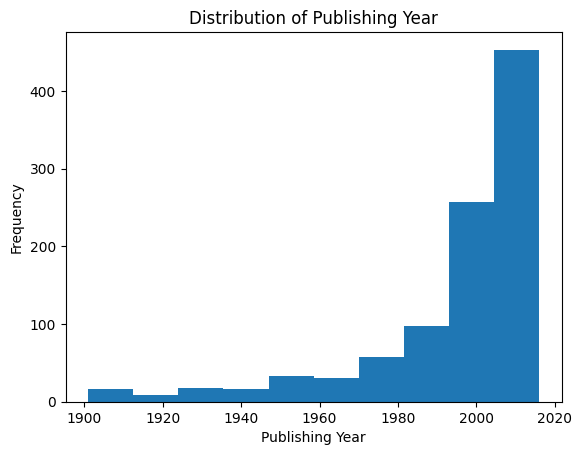

In [ ]:
plt.hist(df['Publishing Year'])
plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.title('Distribution of Publishing Year')
plt.show()

## Most books were published after 1980, with a sharp rise post-2000, showing a surge in modern publishing.

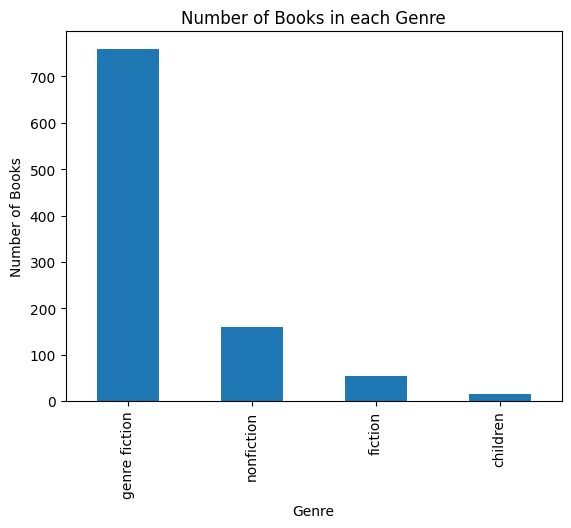

In [ ]:
df['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Number of Books in each Genre')
plt.show()

## Genre fiction dominates the dataset, while other genres are underrepresented.

In [ ]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending = False)

,Book_average_rating
Author,
Bill Watterson,4.650000
"Bill Watterson, G.B. Trudeau",4.610000
J.R.R. Tolkien,4.590000
George R.R. Martin,4.560000
Sarah J. Maas,4.526000
...,...
Chetan Bhagat,3.273333
Audrey Niffenegger,3.230000
"Herman Koch, Sam Garrett",3.220000


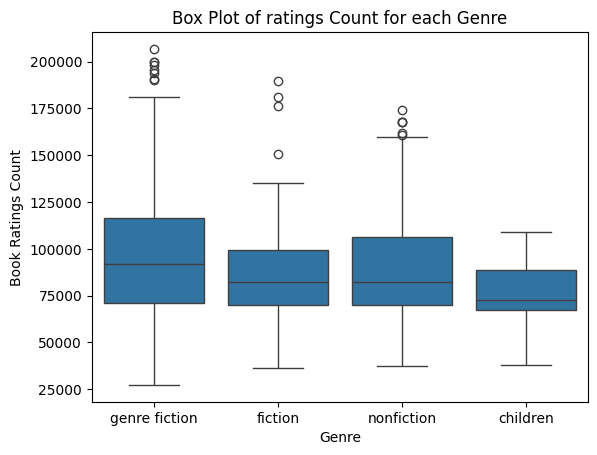

In [ ]:
sns.boxplot(x="genre", y="Book_ratings_count", data=df)
plt.xlabel('Genre')
plt.ylabel('Book Ratings Count')
plt.title('Box Plot of ratings Count for each Genre')
plt.show()

## This box plot compares the distribution of rating counts across different genres. "Genre fiction" has the highest median and most outliers, indicating that it tends to receive more user engagement. All genres show a wide spread in rating counts, with several high outliers, reflecting some books' popularity regardless of genre.

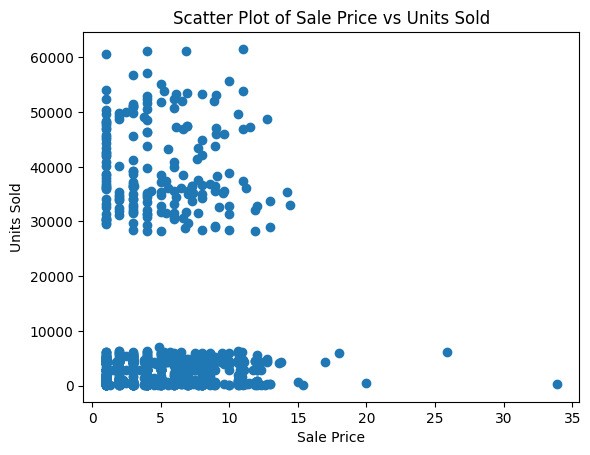

In [ ]:
plt.scatter(df['sale price'], df['units sold'])
plt.xlabel('Sale Price')
plt.ylabel('Units Sold')
plt.title('Scatter Plot of Sale Price vs Units Sold')
plt.show()

## The scatter plot reveals that most books are priced under $15, and units sold cluster into two main groups: low (<10,000) and high (30,000–60,000). There is no strong visible correlation between sale price and units sold, suggesting that factors other than price (e.g., genre, popularity, marketing) significantly affect sales performance.

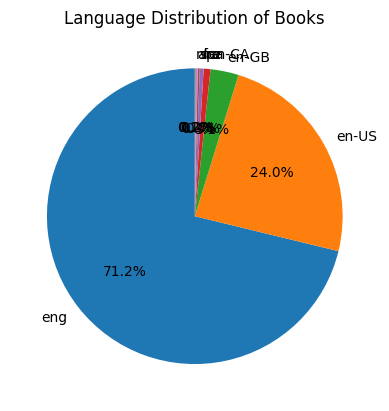

In [ ]:
language_counts = df["language_code"].value_counts()
plt.pie(language_counts, labels=language_counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Language Distribution of Books')
plt.show()

In [ ]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending = False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


In [ ]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending = False).max()

101400.27256944444

In [ ]:
df.groupby("language_code").size().sort_values(ascending = False)

,0
language_code,
eng,670
en-US,226
en-GB,29
en-CA,7
fre,4
ara,2
spa,2
nl,1


In [ ]:
df.groupby("Author_Rating")["Book_ratings_count"].median().sort_values(ascending = False)

,Book_ratings_count
Author_Rating,
Intermediate,98254.5
Famous,90527.0
Excellent,81609.5
Novice,77446.5


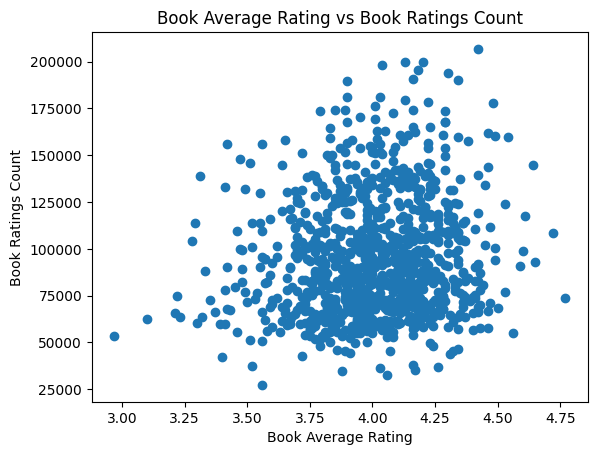

In [ ]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.title("Book Average Rating vs Book Ratings Count")
plt.show()

## The scatter plot shows no strong correlation between average rating and number of ratings. Most books fall between 3.5–4.5 stars, but rating counts vary widely. This suggests that book popularity (rating count) isn’t directly tied to how well it’s rated — other factors like genre or author reputation likely play a role.

<Axes: title={'center': 'Total Gross Sales by Author'}, xlabel='Author', ylabel='Total Gross Sales'>

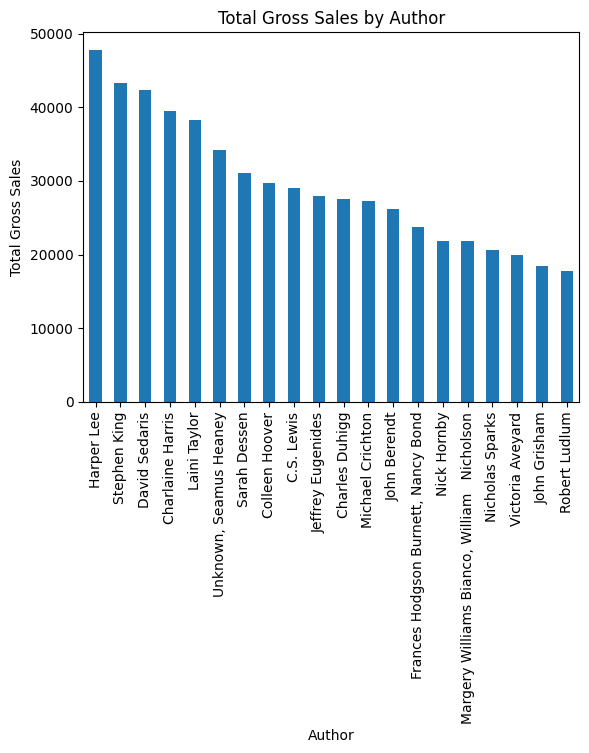

In [ ]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum().sort_values(ascending = False).head(20).plot(kind = "bar")
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales by Author")
total_gross_sales_by_author

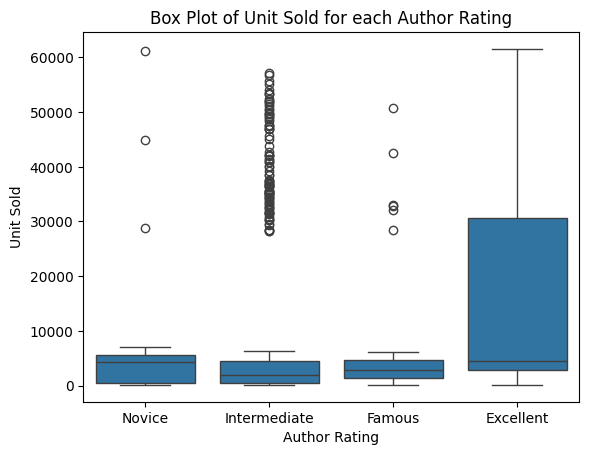

In [ ]:
sns.boxplot(x='Author_Rating', y='units sold', data=df)
plt.xlabel('Author Rating')
plt.ylabel('Unit Sold')
plt.title('Box Plot of Unit Sold for each Author Rating')
plt.show()

## Books by "Excellent" authors sell significantly more, with higher medians and wider sales ranges than other groups. In contrast, Novice to Famous authors show similar, lower sales levels. This highlights the strong commercial advantage of top-rated authors.

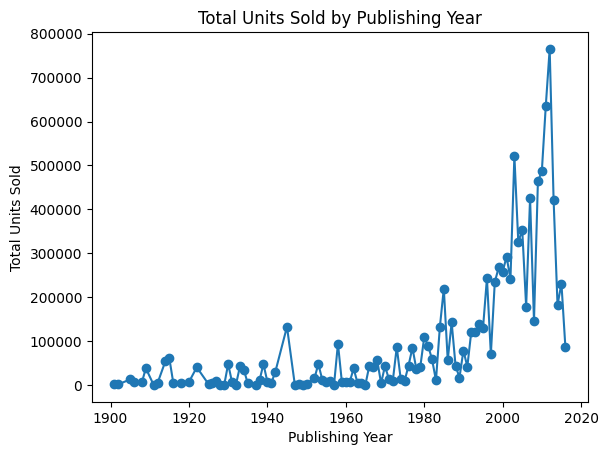

In [ ]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind = "line", marker = "o")
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold by Publishing Year")
plt.show()

## Book sales remained low and steady until the 1980s, after which there was a sharp rise, peaking between 2010–2015. This likely reflects the impact of digital publishing, online sales, and greater accessibility. The dip after 2015 may be due to incomplete data or shifting reading habits.